

## <a> **Análisis Libro de Ventas Periodo 2019 - 2022** </a></a>

Empresa Fabrica de Bidones plásticos

**A) Información de Dataset**

El dataset corresponde a los Libros de ventas mensuales de una fábrica de Bidones plásticos, el periodo que se está utilizando son del 2019 a la fecha (los datos están actualizados hasta septiembre del 2022), esta documentación la obtuve de la empresa donde trabajo actualmente, El objeto de análisis de estos los datos de las ventas es para poder sacar conclusiones y generar Insights para la toma de decisiones en cuanto al rumbo del foco de las ventas que debe adoptar la empresa en el actual escenario. En el Contexto comercial, la empresa vio aumentada la venta de ciertos productos, durante el periodo peak de la pandemia ocasionada por le COVID-19, en específico los productos utilizados para el envasado de cloro y amonio cuaternario, altamente usados para la desinfección de espacios aconsejada por las autoridades para el combate del virus. El día de hoy con un escenario de mayor confianza en cuanto al contagio, la gerencia está preocupada por la disminución de las ventas de estos productos en específico y una baja en las ventas en general, que aparte de la crisis sanitaria, hoy tenemos una crisis económica mundial, que está estancando las ventas de insumos en general, que son los otros artículos que se usan para el detergente, limpiavidrios, limpia pisos, fertilizantes, desechos, etc.  Debido a todos estos temas de contingencia se requiere analizar y tener datos para poder definir el rumbo comercial que debe tomar la empresa. Y para esto queremos ver si con los datos históricos y actuales del comportamiento de las ventas, pre pandemia, post pandemia y escenario actual, podemos entregar información relevante para poder realizar los cambios necesarios para afrontar el escenario actual.

**B) CARGA DE DATOS Y DATAWRANGLING:**

  
**C) PRESENTACION STORYTELLING** 



1.   Análisis comportamiento general del negocio periodo 2019 a 2021
2.   Análisis comparativo mismo peridodo de meses del 2019 a 2022

1.   Análisis movimiento bidon "cloro" vs bidon "con venta constante"
2.   Relaciones de los datos




## B) Carga de los Datos y Data Wrangling

In [4]:
## Cargamos las librerias a usar
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
## El DATASET se carga desde Drive (esta en el link compartido)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df= pd.read_excel("/content/drive/MyDrive/Desafio/DATA WRANGLING/Carpeta sin título/VTAS_2019a2022.xlsx")

In [7]:
print(df.shape)
df= df.drop_duplicates()
print(df.shape)

(73829, 66)
(73812, 66)


In [8]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

UMA                      100.000000
TEXTO                    100.000000
NOMBRE_FANTASIA           91.868531
CELULAR                   41.134233
TELEFONO                  39.157590
DIRECC_LOCAL_DESP         30.507235
COMUNA_LOCAL_DESPACHO     30.507235
CIUDAD_LOCAL_DESP         30.507235
NOMBRE_LOCAL              30.507235
COD_LOCAL_DESPACHO        30.077765
FECHA_REF_1                0.209993
dtype: float64

In [9]:
df.columns

Index(['AÑO', 'MES', 'LOCAL', 'COD_DTE', 'TIPO_DE_DCTO.', 'ESTADO', 'NºDOCTO',
       '_FECHA', 'FECHA_VCTO', 'RUT', 'CLIENTE', 'NOMBRE_FANTASIA',
       'DIRECCION', 'COMUNA', 'CIUDAD', 'GIRO', 'TELEFONO', 'CELULAR',
       'FORMA_DE_PAGO', 'LISTA_PRECIO', 'VENDEDOR', 'COD_LOCAL_DESPACHO',
       'NOMBRE_LOCAL', 'DIRECC_LOCAL_DESP', 'COMUNA_LOCAL_DESPACHO',
       'CIUDAD_LOCAL_DESP', 'NOMBRE_TRANSPORTE', 'NOMBRE_CHOFER', 'VEHICULO',
       'Nº_OC', 'Nº_GD', 'FAMILIA_1', 'FAMILIA_2', 'FAMILIA_3', 'COD.PRODUCTO',
       'PRODUCTO', 'TEXTO', 'UMA', 'CANT.UMA', 'UNI.MED', 'TALLA',
       'LINEA_EXENTA', 'CANTIDAD', 'PRECIO_UNITARIO', 'PRECIO_COSTO',
       'TOTAl_LINEA', '%_DESCUENTO_LINEA', 'TOTAL_DESCUENTO_LINEA',
       'VALOR_NETO_', 'VALOR_EXENTO', '_VALOR_IVA', 'VALOR_TOTAL',
       'REGISTRO_FISCAL5', 'RUT_SUBDIVISION', 'PROCEDENCIA', 'TALLA/PAIS',
       'COLOR/MARCA', 'TIPO_REF_1', 'NUM_REF_1', 'FECHA_REF_1', '_RAZON_REF_1',
       'MUEVE_STOCK', 'PRECIO_UNIT.BRUTO', 'PRECIO_UNI

In [10]:
col_del=['UMA','TEXTO','NOMBRE_FANTASIA']

In [11]:
df_x = df.drop(labels = col_del, axis=1)
df_x.columns

Index(['AÑO', 'MES', 'LOCAL', 'COD_DTE', 'TIPO_DE_DCTO.', 'ESTADO', 'NºDOCTO',
       '_FECHA', 'FECHA_VCTO', 'RUT', 'CLIENTE', 'DIRECCION', 'COMUNA',
       'CIUDAD', 'GIRO', 'TELEFONO', 'CELULAR', 'FORMA_DE_PAGO',
       'LISTA_PRECIO', 'VENDEDOR', 'COD_LOCAL_DESPACHO', 'NOMBRE_LOCAL',
       'DIRECC_LOCAL_DESP', 'COMUNA_LOCAL_DESPACHO', 'CIUDAD_LOCAL_DESP',
       'NOMBRE_TRANSPORTE', 'NOMBRE_CHOFER', 'VEHICULO', 'Nº_OC', 'Nº_GD',
       'FAMILIA_1', 'FAMILIA_2', 'FAMILIA_3', 'COD.PRODUCTO', 'PRODUCTO',
       'CANT.UMA', 'UNI.MED', 'TALLA', 'LINEA_EXENTA', 'CANTIDAD',
       'PRECIO_UNITARIO', 'PRECIO_COSTO', 'TOTAl_LINEA', '%_DESCUENTO_LINEA',
       'TOTAL_DESCUENTO_LINEA', 'VALOR_NETO_', 'VALOR_EXENTO', '_VALOR_IVA',
       'VALOR_TOTAL', 'REGISTRO_FISCAL5', 'RUT_SUBDIVISION', 'PROCEDENCIA',
       'TALLA/PAIS', 'COLOR/MARCA', 'TIPO_REF_1', 'NUM_REF_1', 'FECHA_REF_1',
       '_RAZON_REF_1', 'MUEVE_STOCK', 'PRECIO_UNIT.BRUTO', 'PRECIO_UNIT.NETO',
       'MONTO_DESCTO_GLOBAL', 'TO

In [12]:
print(df.shape)

(73812, 66)


In [13]:
df_x['COD_LOCAL_DESPACHO'] = df_x['COD_LOCAL_DESPACHO'].fillna(df_x['COD_LOCAL_DESPACHO'].median())

In [14]:
pd.set_option('display.max_rows', None)  # or 1000
serie=(df_x.isnull().sum()/df_x.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

CELULAR                  41.134233
TELEFONO                 39.157590
NOMBRE_LOCAL             30.507235
DIRECC_LOCAL_DESP        30.507235
COMUNA_LOCAL_DESPACHO    30.507235
CIUDAD_LOCAL_DESP        30.507235
FECHA_REF_1               0.209993
dtype: float64

In [15]:
col_cat = ['CELULAR','TELEFONO','NOMBRE_LOCAL','DIRECC_LOCAL_DESP','DIRECC_LOCAL_DESP','COMUNA_LOCAL_DESPACHO','CIUDAD_LOCAL_DESP','FECHA_REF_1']

In [16]:
for i in col_cat:
  df_x[i] = df_x[i].fillna('N/A')

In [17]:
alldata=[] # lista para guardar resultados de One hot Encoding
alldata1=[] # lista para guardar resultados de 
variables=[] # ir guardando las variables
for i in df_x.columns: # iterar sobre todas las columnas
  if df_x[i].dtype == 'O': # Quedarme con las que sean tipo object
    if len(df_x[i].unique()) ==2: # Si solo tienen dos categorias aplicar One Hot Encoding
      print('Variable 2 categorias:',i)
      y= pd.get_dummies(df_x[i]) # Aplicar One Hot Encoding
      alldata.append(y) # ir agregando las columnas resultantes en alldata
      variables.append(i)
    else:
      pass
    print('--------------------')
    if len(df_x[i].unique()) >2: # Si las categorias tienen mas de 2 categorias aplicar LabelEncoder
      print('Variable >2 categorias:',i)
      z= pd.DataFrame()
      z[i]=df_x[i].astype('category').cat.codes # Aplicar Label Encoder
      alldata1.append(z) # Agregar a la lista alldata1
      variables.append(i) #
  if df_x[i].dtype == 'float64': # Si la columna es numerica entonces normalizar z score
    df_x[i]=(df_x[i]-df_x[i].mean())/(df_x[i].std()) # yapo
data_y=pd.concat(alldata, axis=1) # concatenar las columnas obtenidas One hot Encoding
data_z=pd.concat(alldata1, axis=1) # concatenar las columnas de Label Encoder
df_y= pd.concat([data_y,data_z,df_x],axis=1) # Unir todos los datasets One Hot Encoding, LabelEncoder, Z score
df_y=df_y.drop(labels=variables, axis=1) # Borrar las columnas ya recodificadas
df_y.head() # mostrar que quedo 

--------------------
Variable >2 categorias: TIPO_DE_DCTO.
--------------------
--------------------
Variable >2 categorias: RUT
--------------------
Variable >2 categorias: CLIENTE
--------------------
Variable >2 categorias: DIRECCION
--------------------
Variable >2 categorias: COMUNA
--------------------
Variable >2 categorias: CIUDAD
--------------------
Variable >2 categorias: GIRO
--------------------
Variable >2 categorias: TELEFONO
--------------------
Variable >2 categorias: CELULAR
--------------------
Variable >2 categorias: FORMA_DE_PAGO
--------------------
Variable >2 categorias: LISTA_PRECIO
--------------------
Variable >2 categorias: VENDEDOR
--------------------
Variable >2 categorias: NOMBRE_LOCAL
--------------------
Variable >2 categorias: DIRECC_LOCAL_DESP
--------------------
Variable >2 categorias: COMUNA_LOCAL_DESPACHO
--------------------
Variable >2 categorias: CIUDAD_LOCAL_DESP
--------------------
Variable >2 categorias: NOMBRE_TRANSPORTE
-----------------

,INSUMOS,PRODUCTOS TERMINADOS,KILOS,UNIDAD,0-,0-0,AÑO,MES,LOCAL,COD_DTE,...,VALOR_NETO_,VALOR_EXENTO,_VALOR_IVA,VALOR_TOTAL,PROCEDENCIA,MUEVE_STOCK,PRECIO_UNIT.BRUTO,PRECIO_UNIT.NETO,MONTO_DESCTO_GLOBAL,TOTAL_LINEA_NETO
0,0,1,0,1,0,1,2019,1,1,33,...,254000,0,-0.011943,302260,NACIONAL,0,0,-0.054386,0,0
1,0,1,0,1,0,1,2019,1,1,33,...,36000,0,-0.451980,42840,NACIONAL,0,0,-0.054386,0,0
2,0,1,0,1,0,1,2019,1,1,33,...,2177280,0,3.870234,2590963,NACIONAL,0,0,-0.054386,0,0
3,0,1,0,1,0,1,2019,1,1,33,...,589680,0,0.665632,701719,NACIONAL,0,0,-0.054386,0,0
4,0,1,0,1,0,1,2019,1,1,33,...,256032,0,-0.007842,304678,NACIONAL,0,0,-0.054386,0,0


In [18]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73812 entries, 0 to 73828
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   AÑO                    73812 non-null  int64         
 1   MES                    73812 non-null  int64         
 2   LOCAL                  73812 non-null  int64         
 3   COD_DTE                73812 non-null  int64         
 4   TIPO_DE_DCTO.          73812 non-null  object        
 5   ESTADO                 73812 non-null  object        
 6   NºDOCTO                73812 non-null  int64         
 7   _FECHA                 73812 non-null  datetime64[ns]
 8   FECHA_VCTO             73812 non-null  datetime64[ns]
 9   RUT                    73812 non-null  object        
 10  CLIENTE                73812 non-null  object        
 11  DIRECCION              73812 non-null  object        
 12  COMUNA                 73812 non-null  object        
 13  C

In [19]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73812 entries, 0 to 73828
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   INSUMOS                73812 non-null  uint8         
 1   PRODUCTOS TERMINADOS   73812 non-null  uint8         
 2   KILOS                  73812 non-null  uint8         
 3   UNIDAD                 73812 non-null  uint8         
 4   0-                     73812 non-null  uint8         
 5   0-0                    73812 non-null  uint8         
 6   AÑO                    73812 non-null  int64         
 7   MES                    73812 non-null  int64         
 8   LOCAL                  73812 non-null  int64         
 9   COD_DTE                73812 non-null  int64         
 10  ESTADO                 73812 non-null  object        
 11  NºDOCTO                73812 non-null  int64         
 12  _FECHA                 73812 non-null  datetime64[ns]
 13  F

In [20]:
df_y.head()

,INSUMOS,PRODUCTOS TERMINADOS,KILOS,UNIDAD,0-,0-0,AÑO,MES,LOCAL,COD_DTE,...,VALOR_NETO_,VALOR_EXENTO,_VALOR_IVA,VALOR_TOTAL,PROCEDENCIA,MUEVE_STOCK,PRECIO_UNIT.BRUTO,PRECIO_UNIT.NETO,MONTO_DESCTO_GLOBAL,TOTAL_LINEA_NETO
0,0,1,0,1,0,1,2019,1,1,33,...,254000,0,-0.011943,302260,NACIONAL,0,0,-0.054386,0,0
1,0,1,0,1,0,1,2019,1,1,33,...,36000,0,-0.451980,42840,NACIONAL,0,0,-0.054386,0,0
2,0,1,0,1,0,1,2019,1,1,33,...,2177280,0,3.870234,2590963,NACIONAL,0,0,-0.054386,0,0
3,0,1,0,1,0,1,2019,1,1,33,...,589680,0,0.665632,701719,NACIONAL,0,0,-0.054386,0,0
4,0,1,0,1,0,1,2019,1,1,33,...,256032,0,-0.007842,304678,NACIONAL,0,0,-0.054386,0,0


In [21]:
df_1 = pd.concat([df_x,df_y])

In [22]:
print(df_1.shape)

(147624, 69)


In [23]:
df_Netostotales = df_1.groupby('AÑO')[['VALOR_NETO_']].sum()

In [24]:
df_Netostotales

,VALOR_NETO_
AÑO,
2019,7943914518
2020,10108266848
2021,12197450788
2022,8119977152


In [25]:
df_Vtaanocompleto = df_1.drop(df_1[df_1['AÑO']>=2022].index)

In [26]:
df_Netostotales2 = df_Vtaanocompleto.groupby('AÑO')[['VALOR_NETO_']].sum()

In [27]:
df_Netostotales2

,VALOR_NETO_
AÑO,
2019,7943914518
2020,10108266848
2021,12197450788


In [28]:
df_1['AÑO']=df_1['AÑO'].astype('str')

In [29]:
df_Netostotales3 = df_1.groupby('AÑO')[['VALOR_NETO_']].sum()

In [30]:
df_Netostotales3

,VALOR_NETO_
AÑO,
2019,7943914518
2020,10108266848
2021,12197450788
2022,8119977152


Para revisar las ventas

In [31]:
df_Vtaanocompleto['AÑO']=df_Vtaanocompleto['AÑO'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_VtaTotal = df_Vtaanocompleto.groupby('AÑO')[['VALOR_NETO_']].sum()

In [33]:
ventas_pandemia = df_VtaTotal.index

In [34]:
Total_ventas_pandemia = df_VtaTotal['VALOR_NETO_']

In [35]:
familiatotal = df_1.groupby('FAMILIA_2')[['VALOR_NETO_']].sum()

In [36]:
ventas_famili = familiatotal.index

In [37]:
Total_ventas_familia = familiatotal['VALOR_NETO_']

In [38]:
periodomeses = df_1[df_1['MES']<=9].reset_index(drop=True)

In [39]:
df_meses = periodomeses.groupby('AÑO')[['VALOR_NETO_']].sum()

In [40]:
ventas_meses = df_meses.index

In [41]:
Total_ventas_meses = df_meses['VALOR_NETO_']

In [42]:
df.columns

Index(['AÑO', 'MES', 'LOCAL', 'COD_DTE', 'TIPO_DE_DCTO.', 'ESTADO', 'NºDOCTO',
       '_FECHA', 'FECHA_VCTO', 'RUT', 'CLIENTE', 'NOMBRE_FANTASIA',
       'DIRECCION', 'COMUNA', 'CIUDAD', 'GIRO', 'TELEFONO', 'CELULAR',
       'FORMA_DE_PAGO', 'LISTA_PRECIO', 'VENDEDOR', 'COD_LOCAL_DESPACHO',
       'NOMBRE_LOCAL', 'DIRECC_LOCAL_DESP', 'COMUNA_LOCAL_DESPACHO',
       'CIUDAD_LOCAL_DESP', 'NOMBRE_TRANSPORTE', 'NOMBRE_CHOFER', 'VEHICULO',
       'Nº_OC', 'Nº_GD', 'FAMILIA_1', 'FAMILIA_2', 'FAMILIA_3', 'COD.PRODUCTO',
       'PRODUCTO', 'TEXTO', 'UMA', 'CANT.UMA', 'UNI.MED', 'TALLA',
       'LINEA_EXENTA', 'CANTIDAD', 'PRECIO_UNITARIO', 'PRECIO_COSTO',
       'TOTAl_LINEA', '%_DESCUENTO_LINEA', 'TOTAL_DESCUENTO_LINEA',
       'VALOR_NETO_', 'VALOR_EXENTO', '_VALOR_IVA', 'VALOR_TOTAL',
       'REGISTRO_FISCAL5', 'RUT_SUBDIVISION', 'PROCEDENCIA', 'TALLA/PAIS',
       'COLOR/MARCA', 'TIPO_REF_1', 'NUM_REF_1', 'FECHA_REF_1', '_RAZON_REF_1',
       'MUEVE_STOCK', 'PRECIO_UNIT.BRUTO', 'PRECIO_UNI

In [43]:
df_cloro=df_1[df_1['COD.PRODUCTO']=='PT010526'].reset_index(drop=True)

In [44]:
df_cloro_S = df_cloro[df_cloro['MES']<=9].reset_index(drop=True)

In [45]:
df_cloro_2019_S = df_cloro_S[df_cloro_S['AÑO']=='2019'].reset_index(drop=True)
df_cloro_2020_S = df_cloro_S[df_cloro_S['AÑO']=='2020'].reset_index(drop=True)
df_cloro_2021_S = df_cloro_S[df_cloro_S['AÑO']=='2021'].reset_index(drop=True)
df_cloro_2022_S = df_cloro_S[df_cloro_S['AÑO']=='2022'].reset_index(drop=True)

In [46]:
df_cloro_2019_S.index = df_cloro_2019_S['AÑO']
df_cloro_2019_S = df_cloro_2019_S.drop('AÑO', axis='columns')

In [47]:
df_cloro_2020_S.index = df_cloro_2020_S['AÑO']
df_cloro_2020_S = df_cloro_2020_S.drop('AÑO', axis='columns')

In [48]:
df_cloro_2021_S.index = df_cloro_2021_S['AÑO']
df_cloro_2021_S = df_cloro_2021_S.drop('AÑO', axis='columns')

In [49]:
df_cloro_2022_S.index = df_cloro_2022_S['AÑO']
df_cloro_2022_S = df_cloro_2022_S.drop('AÑO', axis='columns')

In [50]:
df_VtaTotal2019 = df_cloro_2019_S.groupby('MES')[['VALOR_NETO_']].sum()

In [51]:
df_VtaTotal2020 = df_cloro_2020_S.groupby('MES')[['VALOR_NETO_']].sum()

In [52]:
df_VtaTotal2021 = df_cloro_2021_S.groupby('MES')[['VALOR_NETO_']].sum()

In [53]:
df_VtaTotal2022 = df_cloro_2022_S.groupby('MES')[['VALOR_NETO_']].sum()

In [54]:
df_aceite=df_1[df_1['COD.PRODUCTO']=='PT010402'].reset_index(drop=True)

In [55]:
df_aceite = df_aceite[df_aceite['MES']<=9].reset_index(drop=True)

In [56]:
df_aceite_2019_S = df_aceite[df_aceite['AÑO']=='2019'].reset_index(drop=True)
df_aceite_2020_S = df_aceite[df_aceite['AÑO']=='2020'].reset_index(drop=True)
df_aceite_2021_S = df_aceite[df_aceite['AÑO']=='2021'].reset_index(drop=True)
df_aceite_2022_S = df_aceite[df_aceite['AÑO']=='2022'].reset_index(drop=True)

In [57]:
df_aceite_2019_S.index = df_aceite_2019_S['AÑO']
df_aceite_2019_S = df_aceite_2019_S.drop('AÑO', axis='columns')

In [58]:
df_aceite_2020_S.index = df_aceite_2020_S['AÑO']
df_aceite_2020_S = df_aceite_2020_S.drop('AÑO', axis='columns')

In [59]:
df_aceite_2021_S.index = df_aceite_2021_S['AÑO']
df_aceite_2021_S = df_aceite_2021_S.drop('AÑO', axis='columns')

In [60]:
df_aceite_2022_S.index = df_aceite_2022_S['AÑO']
df_aceite_2022_S = df_aceite_2022_S.drop('AÑO', axis='columns')

In [61]:
df_totalaceite2019 = df_aceite_2019_S.groupby('MES')[['VALOR_NETO_']].sum()

In [62]:
df_totalaceite2020 = df_aceite_2020_S.groupby('MES')[['VALOR_NETO_']].sum()

In [63]:
df_totalaceite2021 = df_aceite_2021_S.groupby('MES')[['VALOR_NETO_']].sum()

In [64]:
df_totalaceite2022 = df_aceite_2022_S.groupby('MES')[['VALOR_NETO_']].sum()

In [65]:
df_Bidon = df_1

In [66]:
relaciones = df_Bidon

In [67]:
relaciones = relaciones.drop(relaciones[relaciones['FAMILIA_2']==('USO INTERNO SISTEMA')].index)
relaciones = relaciones.drop(relaciones[relaciones['FAMILIA_2']==('INSUMOS')].index)
relaciones = relaciones.drop(relaciones[relaciones['FAMILIA_2']==('ETIQUETAS')].index)
relaciones = relaciones.drop(relaciones[relaciones['FAMILIA_2']==('DOSIFICADOR')].index)
relaciones = relaciones.drop(relaciones[relaciones['FAMILIA_2']==('ESTUCHE')].index)
relaciones = relaciones.drop(relaciones[relaciones['FAMILIA_2']==('LLAVE APRIETE')].index)
relaciones = relaciones.drop(relaciones[relaciones['FAMILIA_2']==('USO INTERNO DE SISTEMA')].index)
relaciones = relaciones.drop(relaciones[relaciones['FAMILIA_2']==('TAPA')].index)

In [68]:
relaciones = relaciones.drop(relaciones[relaciones['CANTIDAD']<=0].index)
relaciones = relaciones.drop(relaciones[relaciones['PRECIO_UNITARIO']<=0].index)

In [69]:
relaciones.head()

,AÑO,MES,LOCAL,COD_DTE,TIPO_DE_DCTO.,ESTADO,NºDOCTO,_FECHA,FECHA_VCTO,RUT,...,PRECIO_UNIT.BRUTO,PRECIO_UNIT.NETO,MONTO_DESCTO_GLOBAL,TOTAL_LINEA_NETO,INSUMOS,PRODUCTOS TERMINADOS,KILOS,UNIDAD,0-,0-0
32,2019,1,1,33,FACTURA ELECTRONICA,ACTIVO,21267,2019-01-02,2019-01-02,76586765-7,...,0,-0.054386,0,0,NaN,NaN,NaN,NaN,NaN,NaN
37,2019,1,1,33,FACTURA ELECTRONICA,ACTIVO,21269,2019-01-02,2019-01-02,19756046-0,...,0,-0.054386,0,0,NaN,NaN,NaN,NaN,NaN,NaN
39,2019,1,1,33,FACTURA ELECTRONICA,ACTIVO,21270,2019-01-02,2019-02-16,96998510-1,...,0,-0.054386,0,0,NaN,NaN,NaN,NaN,NaN,NaN
47,2019,1,1,33,FACTURA ELECTRONICA,ACTIVO,21274,2019-01-02,2019-01-02,76527969-0,...,0,-0.054386,0,0,NaN,NaN,NaN,NaN,NaN,NaN
49,2019,1,1,33,FACTURA ELECTRONICA,ACTIVO,21275,2019-01-02,2019-02-16,78568050-2,...,0,-0.054386,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## C) PRESENTACION STORYTELLING

El objetivo de este proyecto es entregar un modelo con los insighs necesarios para la toma de decisiones en cuanto al los patrones y tareas a realizar por la empresa en el escenario actual, como decidir de seguir potenciando ciertos productos o diversificar la oferta, potenciar otros productos que se dejaron de lado durante el peak de la pandemia, revisar el estado de los clientes, ver que clientes se pueden mejorar, recuperar, y/o dejar. Todo esto con el fin de poder mantener y mejorar el nivel de ventas alcanzado los últimos años, en este escecnario adverso. Dicho esto, las preguntas a responder serian: ¿debe la empresa esperar recuperar el nivel de venta de estos productos estrellas durante la pandemia? ¿en el escenario actual, que productos se deben potenciar? Del movimiento de clientes ¿hay clientes que se pueden recuperar, o clientes que se puede mejorar las ventas?¿está preparada la empresa para el escenario económico actual? En los primeros análisis se pudo ver que efectivamente la premisa de la empresa de que existe una baja en las ventas, globales y se requiere generar un plan alternativo para conllevar mejor la situación actual.

 **1.
Análisis comportamiento general del negocio periodo 2019 a 2021**



*   Primero analizamos los datos de los periodos ya concluidos que corresponden a 2019 pre pandemia, 2020 inicio de la pandemia y 2021 peak de esta agregando el incicio de la vuelta a la normalidad en las sociedades




Text(0.5, 0, 'Año')

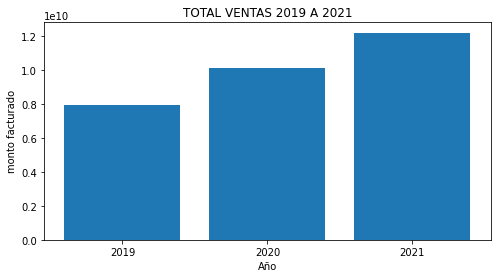

In [70]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(ventas_pandemia,Total_ventas_pandemia)
ax.set_title('TOTAL VENTAS 2019 A 2021')
ax.set_ylabel('monto facturado')
ax.set_xlabel('Año')

En este gráfico podemos apreciar de forma clara y sencilla que efectivamente las ventas totales aumentaron considerablemente para el año 2021

Si analizamos las ventas del periodo, por familia de los articulos vendidos* donde se aprecia claramente que la venta del articulo Bidon es la que tiene la mayor cantidad de articulos vendidos en el perido analizado.


*se excluyo del análisis las tapas que si bien es un dato alto, la venta de estas va relacionada a la venta de los bidones o botellas 

([<matplotlib.patches.Wedge at 0x7ff73b2dd390>,
 [Text(-0.7929725616243368, 0.7623611457248707, 'BIDON'),
  Text(0.32308314631553947, -1.0514833715122898, 'BOTELLA'),
  Text(0.5825573107038822, -0.9330739411994425, 'DOSIFICADOR'),
  Text(0.5845876401738784, -0.9318032469121023, 'ESTUCHE'),
  Text(0.5860997327257574, -0.930852890256455, 'ETIQUETAS'),
  Text(0.6011505908642499, -0.9212046282469293, 'FRASCO'),
  Text(0.6225639458330197, -0.9068705163080455, 'INSUMOS'),
  Text(0.6300580766138708, -0.9016799987210706, 'LLAVE APRIETE'),
  Text(0.6721137899837594, -0.8707830116129202, 'POTE'),
  Text(0.9983873103986329, -0.46176052065435813, 'TAPA')])

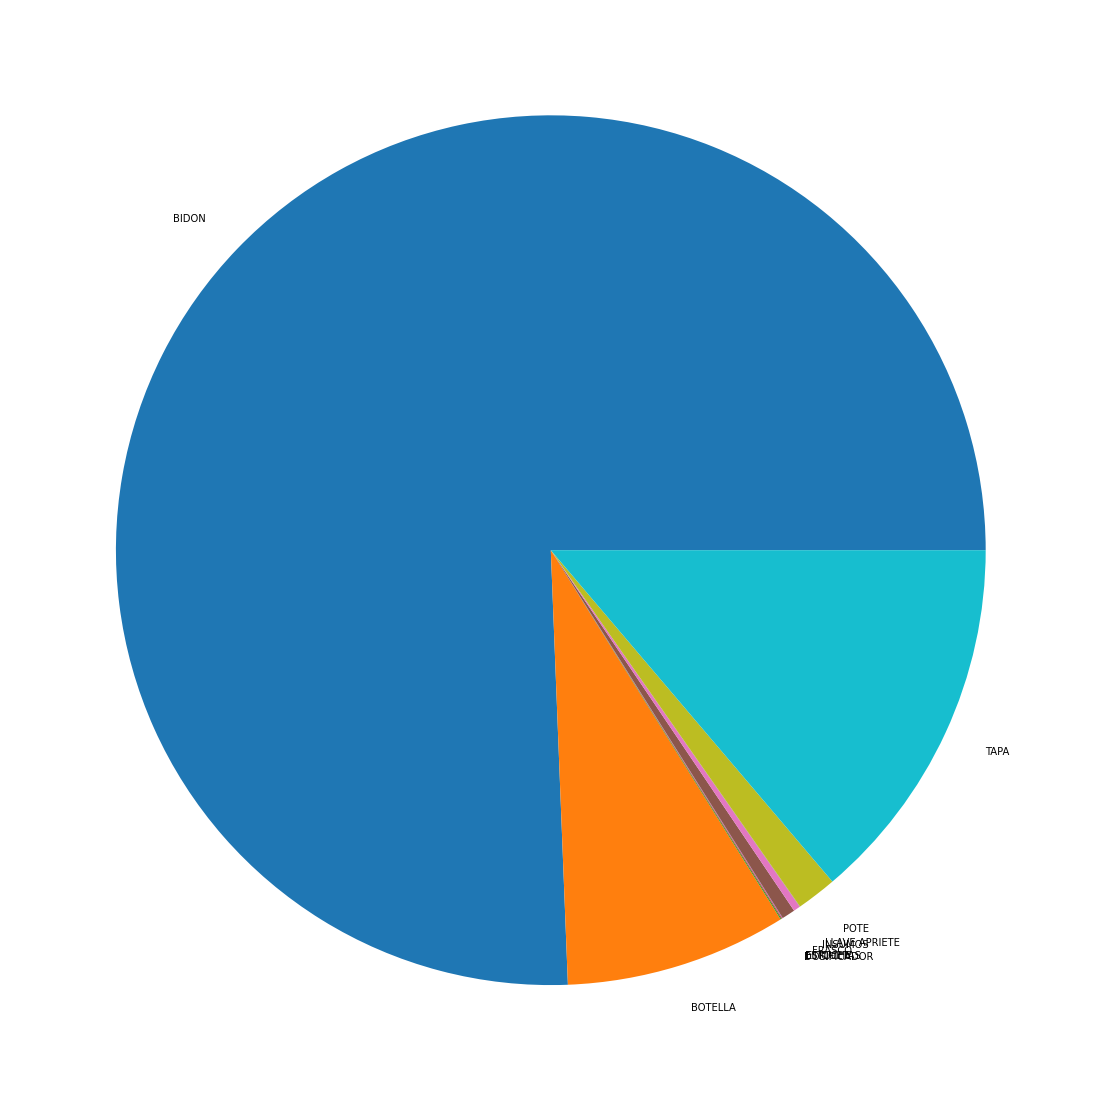

In [71]:
fig, ax = plt.subplots(figsize=(20,20))
ax.pie(Total_ventas_familia, labels = ventas_famili)

En un grafíco de torta se parecia mejor aún el porcentaje que representa la venta de los bidones en las ventas totales del periodo





**2. Análisis comparativo mismo peridodo de meses del 2019 a 2022**

 

*   Ahora analizaremos incluyendo los movimientos del periodo actual, y para que el dato sea mas representativo, se utlizaran los mismos meses de cada periodo, esto quiere decir, de enero a septiembre de cada año


Text(0.5, 0, 'Año')

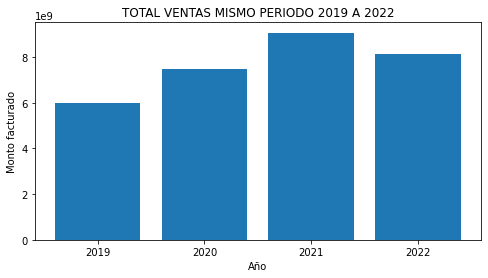

In [72]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(ventas_meses,Total_ventas_meses)
ax.set_title('TOTAL VENTAS MISMO PERIODO 2019 A 2022')
ax.set_ylabel('Monto facturado')
ax.set_xlabel('Año')

En este gráfico de barras, podemos apreciar que efectivamente las ventas totales han bajado en el mismo periodo de meses, aun así se mantiene sobre las ventas del año 2020 que fue el inicio de la pandiemia

**3. Análisis movimiento bidon "cloro" vs bidon "con venta constante"**

Vamos a ver los movimientos entre los años y mes a mes, del producto usado para el cloro que vi su aumento en pandiemia, y otro producto que se ha mantenido constante y que en el escenario actual es interesante ver si existe variacion ya que es el utilizado para la venta de aceite al mayor, insumo que se ha visto afectado por la actual guerra en ukrania

*Primero veamos el bidon de cloro*

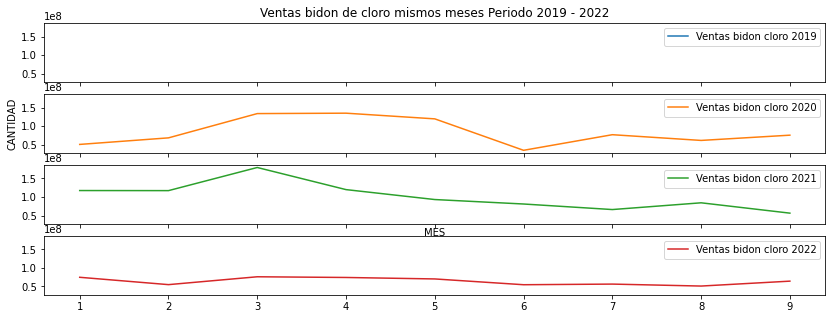

In [73]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 5), sharex=True, sharey=True)  
ax[0].plot(df_VtaTotal2019.index, df_VtaTotal2019['VALOR_NETO_'], label='Ventas bidon cloro 2019')
ax[1].plot(df_VtaTotal2020.index, df_VtaTotal2020['VALOR_NETO_'], label='Ventas bidon cloro 2020', color='C1')
ax[2].plot(df_VtaTotal2021.index, df_VtaTotal2021['VALOR_NETO_'], label='Ventas bidon cloro 2021', color='C2')
ax[3].plot(df_VtaTotal2022.index, df_VtaTotal2022['VALOR_NETO_'], label='Ventas bidon cloro 2022', color='C3')
ax[0].set_title('Ventas bidon de cloro mismos meses Periodo 2019 - 2022') 
ax[2].set_xlabel('MES')
ax[1].set_ylabel('CANTIDAD')

ax[0].legend()  
ax[1].legend()
ax[2].legend()   
ax[3].legend()

Aquí podemos ver, primero claramente antes del 2020 no hay ventas de este producto, lo que es raro ya que si bien existe un boom para la pandemia, es un producto que se ha comercializado siempre. En cuanto los peridos 2020 a 2022, en los dos primeros se aprecia un peak en el mes de marzo y una caida al mes de Junio. Pero para el caso del año 2022 la linea es mas recta, esto seria algo a analizar

*Y el mismo ejerecicio para el bidon de Aceite*

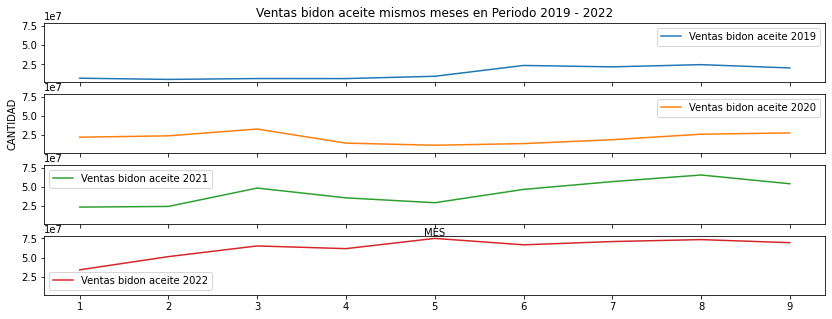

In [74]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 5), sharex=True, sharey=True)  
ax[0].plot(df_totalaceite2019.index, df_totalaceite2019['VALOR_NETO_'], label='Ventas bidon aceite 2019')
ax[1].plot(df_totalaceite2020.index, df_totalaceite2020['VALOR_NETO_'], label='Ventas bidon aceite 2020', color='C1')
ax[2].plot(df_totalaceite2021.index, df_totalaceite2021['VALOR_NETO_'], label='Ventas bidon aceite 2021', color='C2')
ax[3].plot(df_totalaceite2022.index, df_totalaceite2022['VALOR_NETO_'], label='Ventas bidon aceite 2022', color='C3')
ax[0].set_title('Ventas bidon aceite mismos meses en Periodo 2019 - 2022') 
ax[2].set_xlabel('MES')
ax[1].set_ylabel('CANTIDAD')

ax[0].legend()  
ax[1].legend()
ax[2].legend()   
ax[3].legend()

Aquí podemos apreciar que existe un aumento y una venta constante de este bidón en el año actual, un dato a considerar ante el estancamiento de la venta del bidon de cloro

**4. Relaciones de los datos**

Revisemos graficos que pueden generar datos relevante para el analisis y la toma de decisiones

Veamos si existen relaciones claras entre los datos de las columnas, en general con los datos que tenemos no es posible establecer una relacion constante entre los datos

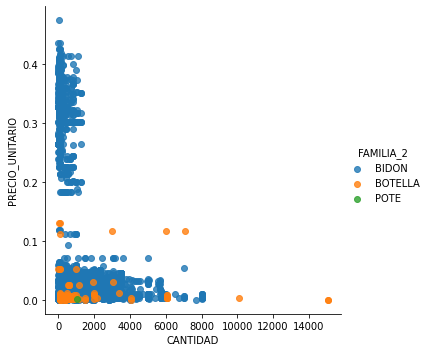

In [75]:
sns.lmplot(x ='CANTIDAD', y = 'PRECIO_UNITARIO', data = relaciones, fit_reg = False, hue = 'FAMILIA_2')

In [76]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [77]:
import pandas_profiling

In [78]:
profile = pandas_profiling.ProfileReport(df_1)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [79]:
col_drop = ['ESTADO', 'TELEFONO', 'CELULAR', 'Nº_OC', 'Nº_GD', 'CANT.UMA', 'TALLA', 'REGISTRO_FISCAL5', 'PROCEDENCIA','TALLA/PAIS', 'TIPO_REF_1', 'NUM_REF_1', 'FECHA_REF_1']

In [80]:
df_2 = df_1.drop(labels = col_drop, axis=1)
df_2.columns

In [ ]:

plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df_2['CANTIDAD'], df_2['PRECIO_UNITARIO'], palette = 'viridis')
plt.title('Relación entre cantidad y precio unitario', fontsize = 20)
plt.show()